In [1]:
import pandas as pd
import os.path as path
import os
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


data_path = "../data/"
train_dirname = "DAM"
csv_filename = "product_list.csv"

def load_csv_to_dataframe():
    csv_path = path.join(data_path, csv_filename)
    return pd.read_csv(csv_path)

infos = load_csv_to_dataframe()
infos.rename(columns={"MMC": "article_id", "Product_BusinessUnitDesc" : "classe"}, inplace=True)

classes = infos["classe"].unique()
print("classes : ",classes)
print("\nCOUNT:")
print(infos.groupby("classe").count())


classes :  ['W RTW' 'W SLG' 'W Bags' 'W Shoes' 'Watches' 'W Accessories']

COUNT:
               article_id
classe                   
W Accessories         543
W Bags                830
W RTW                 627
W SLG                 302
W Shoes               336
Watches               129


In [3]:

diff = {
    'W RTW' : 2,
    'W SLG' : 3,
    'W Bags' : 5,
    'W Shoes' : 3,
    'Watches' : 4,
    'W Accessories' : 2
}

infos["sous_classe"] = infos["article_id"].apply(lambda x: x[:diff[infos[infos["article_id"]==x]["classe"].values[0]]])

print(infos.groupby(["classe"])["sous_classe"].nunique())
print("ratio :")
num_sous_classes = infos.groupby(["classe"])["sous_classe"].nunique()
num_articles = infos.groupby(["classe"])["sous_classe"].count()
print(num_articles/num_sous_classes)



classe
W Accessories    63
W Bags           76
W RTW            20
W SLG            24
W Shoes          14
Watches          12
Name: sous_classe, dtype: int64
ratio :
classe
W Accessories     8.619048
W Bags           10.921053
W RTW            31.350000
W SLG            12.583333
W Shoes          24.000000
Watches          10.750000
Name: sous_classe, dtype: float64


In [4]:
def get_all_sous_classes(infos,classe):
    return list(infos[infos.classe==classe]["sous_classe"].unique())

def get_random_class(infos,classe):
    return rd.choice(get_all_sous_classes(infos,classe)) 

print(get_random_class(infos,"W Accessories"))

32


In [5]:
def get_class_list(infos,classe,sous_classe):
    df = infos[infos.classe==classe]
    return df[df["sous_classe"] == sous_classe]["article_id"].tolist()

classe = rd.sample(list(classes),1)[0]
sous_classe = get_random_class(infos,classe)
print(classe,sous_classe)
print(get_class_list(infos,classe,sous_classe))

W SLG S09
['S0918OAYCM17A', 'S0918ONMJM67P', 'S0918ONMJM97B', 'S0935ONMJM76P', 'S0935OWCBM03Z', 'S0946OVRBM900', 'S0949HAQRJM042', 'S0959ONMJM29Y', 'S0965ONMJM69H', 'S0965ONMJM76P', 'S0977BNMJM030', 'S0977BNMJM900', 'S0981ONMJM030']


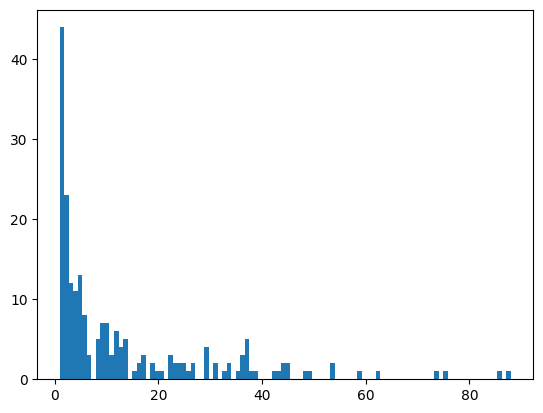

In [6]:
#repartition
l = {}
for classe in list(classes):
    for sous_classe in get_all_sous_classes(infos,classe):
        l[classe+"_"+sous_classe] = len(get_class_list(infos,classe,sous_classe))
plt.hist(l.values(),bins=100)
for key in l.keys():
    if l[key]>=100:
        print(key,l[key])

Watches CDBZ
Nombre d'images : 4


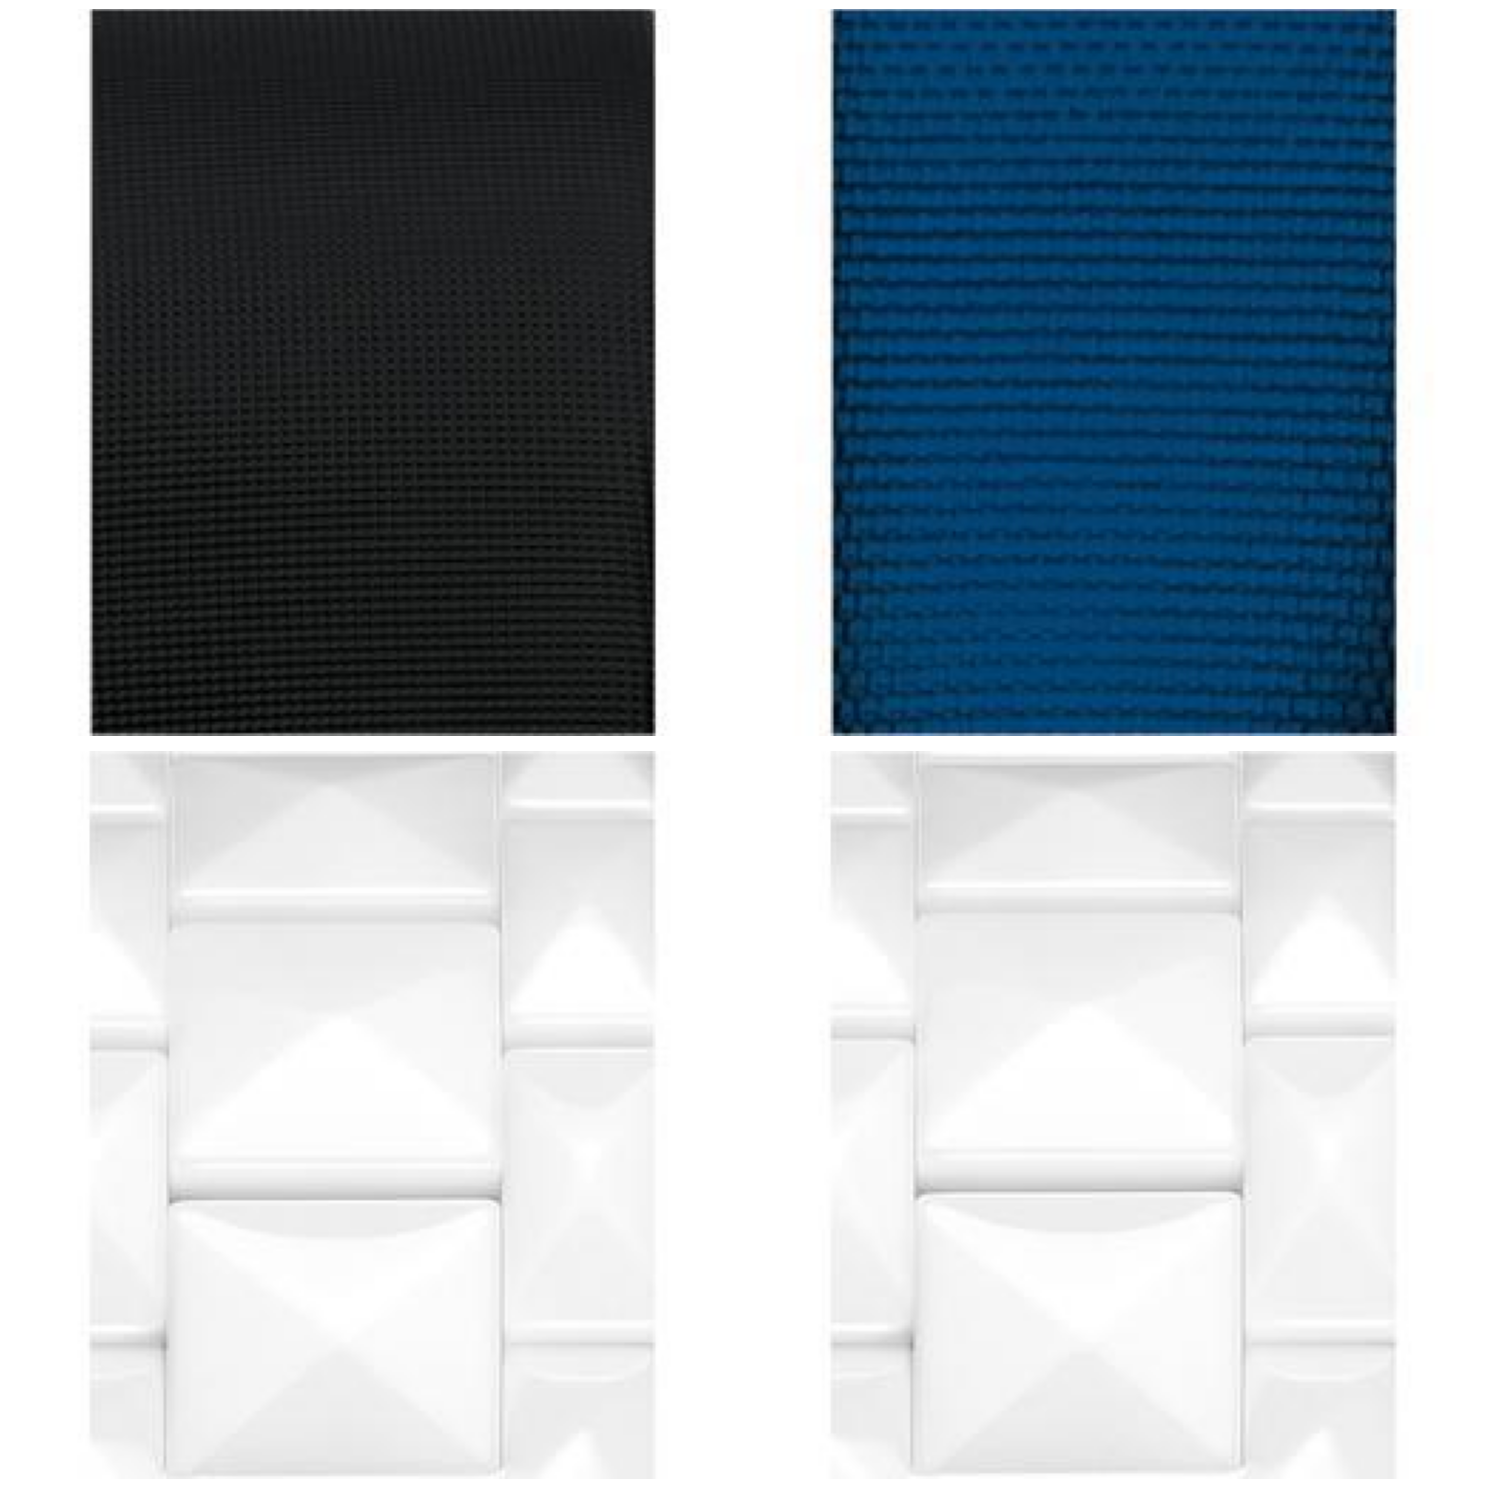

In [12]:
import matplotlib.image as mpimg
import numpy as np
import glob


classe = rd.sample(list(classes),1)[0]
sous_classe = get_random_class(infos,classe)
images_filenames = get_class_list(infos,classe,sous_classe)

# Lire toutes les images d'un dossier
image_filepaths = [path.join(data_path, train_dirname, filename+".jpeg") for filename in images_filenames]

# Définir le nombre de colonnes pour la grille
num_images = len(image_filepaths)
print(classe,sous_classe)
print("Nombre d'images :", num_images)

if num_images == 1:
    fig, ax = plt.subplots(figsize=(5, 5))
    img = mpimg.imread(image_filepaths[0])
    ax.imshow(img)
    ax.axis('off')
    
elif num_images<=2 :
    num_cols = 2
    num_rows = 1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    for i, file in enumerate(image_filepaths):
        img = mpimg.imread(file)
        ax = axes[i]
        ax.imshow(img)
        ax.axis('off')


else:
    
    num_cols = np.floor(np.sqrt(num_images)).astype(int)
    if num_cols**2 < num_images:
        num_cols += 1
    num_rows = num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    for i, file in enumerate(image_filepaths):
        try:
            img = mpimg.imread(file)
            ax = axes[i // num_cols, i % num_cols]
            ax.imshow(img)
            ax.axis('off')
        except:
            print("Error with file", file)

plt.tight_layout()
plt.show()

In [8]:
num_sous_classes = infos.groupby(["classe"])["sous_classe"].nunique().sum()
print(num_sous_classes)

dict_classes = {}
i = 1
for classe in list(classes):
    for sous_classe in get_all_sous_classes(infos,classe):
        dict_classes[classe+"_"+sous_classe] = i
        i+=1
infos["new_classe"] = infos.apply(lambda x: dict_classes[x["classe"]+"_"+x["sous_classe"]],axis=1)

def save_df(infos):
    df_tosave = infos.rename(columns={"classe": "categorie",}, inplace=False)
    df_tosave.to_csv(f"product_list_with_new_classe(n={num_sous_classes}).csv",index=False)



209
